# Mini Projet - à quoi tu ressembles sans ton masque ?

Avec la pandémie de la Covid-19, nous avons appris à porter des masques quotidiennement. 
Désormais la moitié de notre visage est cachée nous laissant le regard pour seul moyen d'expression visible. Cette opération de restaurer le visage s'apparente à un domaine en traitement d'images et de vidéos appelé *inpainting*. En effet, les pixels correspondant à la zone du masque (modélisé par un rectangle) sont mis à 0. Et l'ACP et les *eigenfaces* permettent, entre autres, de restaurer la zone dégradée.  


L'**objectif de ce mini projet** consiste à combler la zone de masque par un visage qui est le plus semblable à l'aide de l'ACP et des $k$ plus proches voisins.

In [2]:
import numpy as np
import sklearn
import matplotlib.pyplot as plt
from matplotlib import image
from random import *
from sklearn.metrics.pairwise import euclidean_distances

## Chargement des données

La base de données sur laquelle ce projet est appliqué est une collection d'images utiles pour mener des expériences en psychologie (*Psychological Image Collection at Stirling* (PICS) :http://pics.stir.ac.uk). 

<img src="files/base.png" width="800" height="600"  >

Elle comporte 32 personnes (16 hommes et 16 femmes) avec 6 postures/expressions  faciales : 2 postures (face et trois quart face) et 3 émotions différentes par posture.



In [ ]:
# Importer des fichiers sur Google Colab à partir de votre ordinateur : 

from google.colab import files

uploaded = files.upload()

Saving DataS.npy to DataS.npy


## Choix base apprentissage

### Complète

In [3]:
# Chargement des données de visages masqués : 192 x 120000
X_DataMask=np.load('DataSMask.npy')

# Création de la base d'apprentissage : exemple à modifier
# X_App=X_DataMask[np.arange(0,16),:] 
X_App=X_DataMask[np.arange(0,12),:] 

### Femme

In [135]:
# Chargement des données de visages masqués : 192 x 120000
X_DataMask=np.load('DataMask.npy')

# Création de la base d'apprentissage : exemple à modifier
# X_App=X_DataMask[np.arange(0,16),:]
#X_App=X_DataMask[:]

X_App = np.zeros((int(X_DataMask.shape[0]/2),X_DataMask.shape[1]))
cpt = 0
next_section = 0
for i in range(0,X_DataMask.shape[0]):
    if i >= next_section:
        X_App[cpt]=X_DataMask[i]
        cpt += 1
        if cpt%6 == 0:
            next_section += 12

### Homme

In [132]:
# Chargement des données de visages masqués : 192 x 120000
X_DataMask=np.load('DataMask.npy')

X_App = np.zeros((int(X_DataMask.shape[0]/2),X_DataMask.shape[1]))
cpt = 0
next_section = 6
for i in range(0,X_DataMask.shape[0]):
    if i >= next_section:
        X_App[cpt]=X_DataMask[i]
        cpt += 1
        if cpt%6 == 0:
            next_section += 12

## Affichage de la base d'apprentissage

(12, 120000)
(16, 120000)


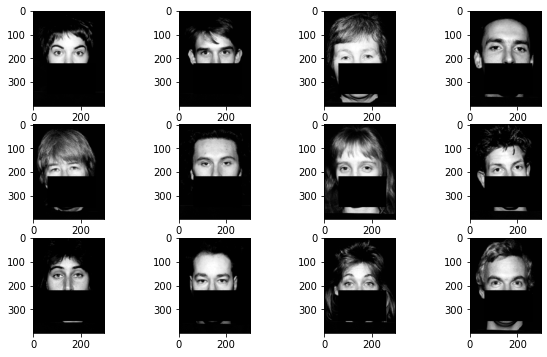

In [4]:
print(X_App.shape)
print(X_DataMask.shape)

# Affichage des visages masqués de la base d'apprentissage
plt.figure(figsize=(10,100))
compt=0
for i in range(0,X_App.shape[0]):
    im=np.reshape(X_App[i,:],(400,300))
    plt.subplot(48,4,i+1)
    compt=compt+1
    plt.imshow(im,cmap='gray')
    
plt.show()

##  Eigenfaces et réduction de dimensions par ACP

Complétez la fonction *eigenfaces*, qui vise à calculer les axes
principaux des images d'apprentissage à partir des vecteurs propres associés
aux $n-1$ valeurs propres non nulles de la matrice de variance/covariance
$\Sigma$ des données/.


<img src="files/Eigenfaces.png" width="600" height="500"  >

**Remarque :**  la
    fonction *np.linalg.eig* ne peut pas être directement appliquée à $\Sigma$. En
    effet, sa taille $p\times p$ est gigantesque ($p = 120000$). Or, pour une
    matrice $\text{M}$ quelconque, $\text{M}^\top \text{M}$ et
    $\text{M}\,\text{M}^\top$ ont les mêmes valeurs propres **non nulles**.
    On peut donc appliquer la fonction *np.linalg.eig* à $\Sigma_2 = \text{X}_c \,
    \text{X}_c^\top/n$, de taille $n\times n$ beaucoup plus petite, pour
    calculer les valeurs propres non nulles de $\Sigma$.

In [5]:
def eigenface(X_App,nb_component):
    Xc = X_App - np.mean(X_App, axis=0)
    
    sigma2 = Xc@Xc.T
    sigma2 = (1/X_App.shape[0])*sigma2
    
    val_p, vec_p = np.linalg.eig(sigma2)
    vec = Xc.T@vec_p

    ComposantesPrincipales = X_App@vec

    # Affichage des visages masqués de la base d'apprentissage
    plt.figure(figsize=(10,100))
    compt=0
    for i in range(0,X_App.shape[0]):
        im=np.reshape(vec[:,i],(400,300))
        plt.subplot(48,4,compt+1)
        compt=compt+1
        plt.imshow(im,cmap='gray')
        
    plt.show()
    return (ComposantesPrincipales, vec)  

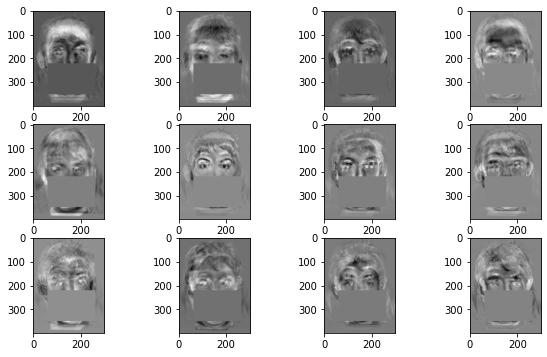

(12, 12)
(120000, 12)


In [6]:
cp, vp = eigenface(X_App, 0)
print(cp.shape)
print(vp.shape)

## Reconnaissance par kppv

En tirant aléatoirement une image de test, parmi les 32 personnes et les 6 postures faciales disponibles dans la base de données complète, complétez une fonction pour trouver l'individu (personne+posture) dans la base d'apprentissage qui est le plus proche de l'image de test (vous pouvez utiliser et adapter la fonction \texttt{kppv} que vous avez écrite lors du TP2). 

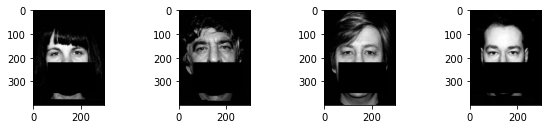

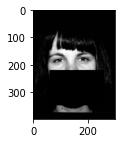

In [39]:
# # Chargement des données de visages masqués : 192 x 120000
# X_Data=np.load('DataS.npy')

# # Création de la base de test
# X_Test=X_DataMask[np.arange(0,16,1),:]

# img_test = X_Test[randrange(16)]

# Chargement des données de visages masqués : 192 x 120000
X_Data=np.load('DataS.npy')

# Création de la base de test
# X_Test=X_DataMask[:10]
X_Test = np.load('DataSMask.npy') 
X_Test = X_Test[12:]

# img_test = X_DataMask[randrange(12,15)]
img_test = X_Test[randrange(0,4)]

# Affichage des visages masqués de la base d'apprentissage
plt.figure(figsize=(10,100))
compt=0
for i in range(0,X_Test.shape[0]):
    im=np.reshape(X_Test[i,:],(400,300))
    plt.subplot(48,4,compt+1)
    compt=compt+1
    plt.imshow(im,cmap='gray')
    
plt.show()

# Affichage des visages masqués de la base d'apprentissage
plt.figure(figsize=(2,2))
im=np.reshape(img_test,(400,300))
plt.imshow(im,cmap='gray')     
plt.show()

img_test_ef = img_test@vp
set_test_ef = X_Test@vp

In [19]:
def kppv(DataApp, DataTest, K):
    Nt = DataTest.shape[0]

    print("shape DA "+str(DataApp.shape))

    res = []

    for i in range(Nt):
        dist = euclidean_distances(DataApp, [DataTest])
        sortedDistIndex = np.argsort(dist, axis=None)
        indexKppv = sortedDistIndex[:K]
        res.append(indexKppv[0])

    return res[0]

shape DA (4, 12)
indice retourné 0


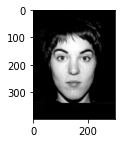

In [40]:
# print("shape img_test "+str(img_test.shape))
# print("shape set_test "+str(set_test.shape))

img_test=np.array(img_test)

result = kppv(set_test_ef, img_test_ef,1)
print("indice retourné "+str(result))
index_img = result

plt.figure(figsize=(2,2))
im=np.reshape(X_Data[result],(400,300))
plt.imshow(im,cmap='gray')     
plt.show()

## Reconstruction et évaluation

A partir de la question précédente, implémentez la reconstruction de la zone du masque  en remplaçant la zone correspondant au masque par la zone de l'image de la base d'apprentissage de visages entiers (fichier **Data.npy**) la plus proche dans l'espace défini par les eigenfaces masqués.


Pour pouvoir remplir la zone du masque, nous nous appuyons sur le travail de M. Turk et A. Pentland intitulé «Eigenfaces for
Recognition» : https://www.mitpressjournals.org/doi/pdfplus/10.1162/jocn.1991.3.1.71 

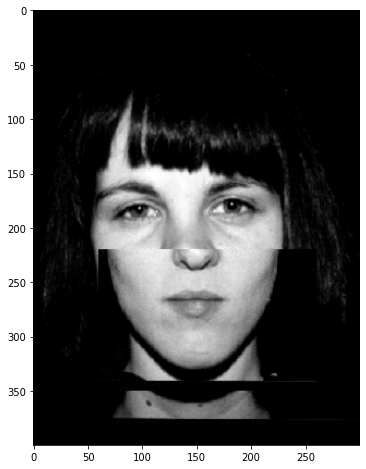

In [41]:
def build(img_source, img_mask):
    res = np.reshape(img_mask,(400,300))
    img_source = np.reshape(img_source, (400,300))
  
    res[220:350,60:260] = img_source[220:350,60:260]

    return res

a = X_Data[index_img]
b = img_test

result = build(a, b)

plt.figure(figsize=(8,8))
im=np.reshape(b,(400,300))
plt.imshow(im,cmap='gray')     
plt.show()